<a href="https://colab.research.google.com/github/karkid/exploratory-analysis/blob/main/AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air BNB

# Import Libs

In [50]:
# Stats
import numpy as np;
import pandas as pd;

# For visulatization
import matplotlib.pyplot as plt;
%matplotlib inline

import seaborn as sns;
sns.set();

# Ignore warnings
import warnings;
warnings.filterwarnings('ignore');

# About the Data

## Load dataset

In [51]:
df = pd.read_csv("drive/MyDrive/AirBNB.csv");
display(df.head());

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


## Shape

* 74111 records
* 11 Features

In [52]:
display(df.shape)

(74111, 11)

## Data inconsistancy

### Missing observations

|feature| missing_count | missing_count_% | dtypes|
|----------|--- |---|---|
|room_type | 5  |	0.006747 |	object |
|accommodates | 3  |0.004048|	float64|
|bathrooms | 203 |0.273913	|float64|
|cancellation_policy | 8|	0.010795|	object|
|cleaning_fee | 4	|0.005397	|object|
|review_scores_rating| 16722|	22.563452|	float64|
|bedrooms | 92	|0.124138	|float64|
|beds | 131|	0.176762|	float64|

In [53]:
# data types
dtypes = df.dtypes

# missing observartions
missing_counts = df.isna().sum();
missing_counts_per = missing_counts/len(df) * 100;

# matrix
matrix = [ missing_counts, missing_counts_per, dtypes ];
keys = ["missing_count", "missing_count_%", "dtypes"];

# tabular matrix
display(pd.concat(matrix, axis=1, keys=keys));

,missing_count,missing_count_%,dtypes
id,0,0.000000,int64
room_type,5,0.006747,object
accommodates,3,0.004048,float64
bathrooms,203,0.273913,float64
cancellation_policy,8,0.010795,object
cleaning_fee,4,0.005397,object
instant_bookable,0,0.000000,object
review_scores_rating,16722,22.563452,float64
bedrooms,92,0.124138,float64
beds,131,0.176762,float64


### Duplicate observations

* No duplicate observation found.

In [54]:
display(df.duplicated().sum())

0

### Unique observations

* id has 100% unique observations.

In [55]:
unique_value_counts = []
for feature in df.columns:
  unique_value_counts.append(len(df[feature].dropna().unique()));

display(pd.DataFrame(unique_value_counts, index=df.columns, columns=["unique_value_count"]))

,unique_value_count
id,74111
room_type,3
accommodates,16
bathrooms,17
cancellation_policy,3
cleaning_fee,2
instant_bookable,2
review_scores_rating,54
bedrooms,11
beds,18


### Data types

* No Data type inconsistancy found
* Data types

|Variable| Value|
|:----------:|:---------:|
|discrete_threshold|20 unique observation count|
|numerical_discrete_feature|['accommodates', 'bathrooms', 'bedrooms', 'beds']|
|numerical_continous_feature|['id', 'review_scores_rating', 'log_price']|
|categorical_ordinal_feature|['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']|

In [56]:
df.dtypes

id                        int64
room_type                object
accommodates            float64
bathrooms               float64
cancellation_policy      object
cleaning_fee             object
instant_bookable         object
review_scores_rating    float64
bedrooms                float64
beds                    float64
log_price               float64
dtype: object

In [57]:
discrete_threshold = 20;

numerical_discrete_feature = [feature for feature in df.select_dtypes(exclude="object").columns if len(df[feature].unique()) < discrete_threshold];
numerical_continous_feature = [feature for feature in df.select_dtypes(exclude="object").columns if len(df[feature].unique()) > discrete_threshold];
categorical_ordinal_feature = [feature for feature in df.select_dtypes(include="object").columns];

display(numerical_discrete_feature);
display(numerical_continous_feature);
display(categorical_ordinal_feature);

['accommodates', 'bathrooms', 'bedrooms', 'beds']

['id', 'review_scores_rating', 'log_price']

['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

## Data distribution

* "Entire home/apt" is very common "room_type".
* Mostly customer opt for "strict" "cancellation_policy".
* Mostly customer don't opt "instant_booking".
* Mostly cleaning_fee is applicable.
* 1 bathroom is very common with frequency is 78.6%.
* 1 bedroom is very common with frequency is 67.3%.
* 1 bed is very common with frequency is 61.0%.
* review_score_rating distribution is negative skewed.
* log_price distribution is approximately normally distributed.

### Categorical data distribution

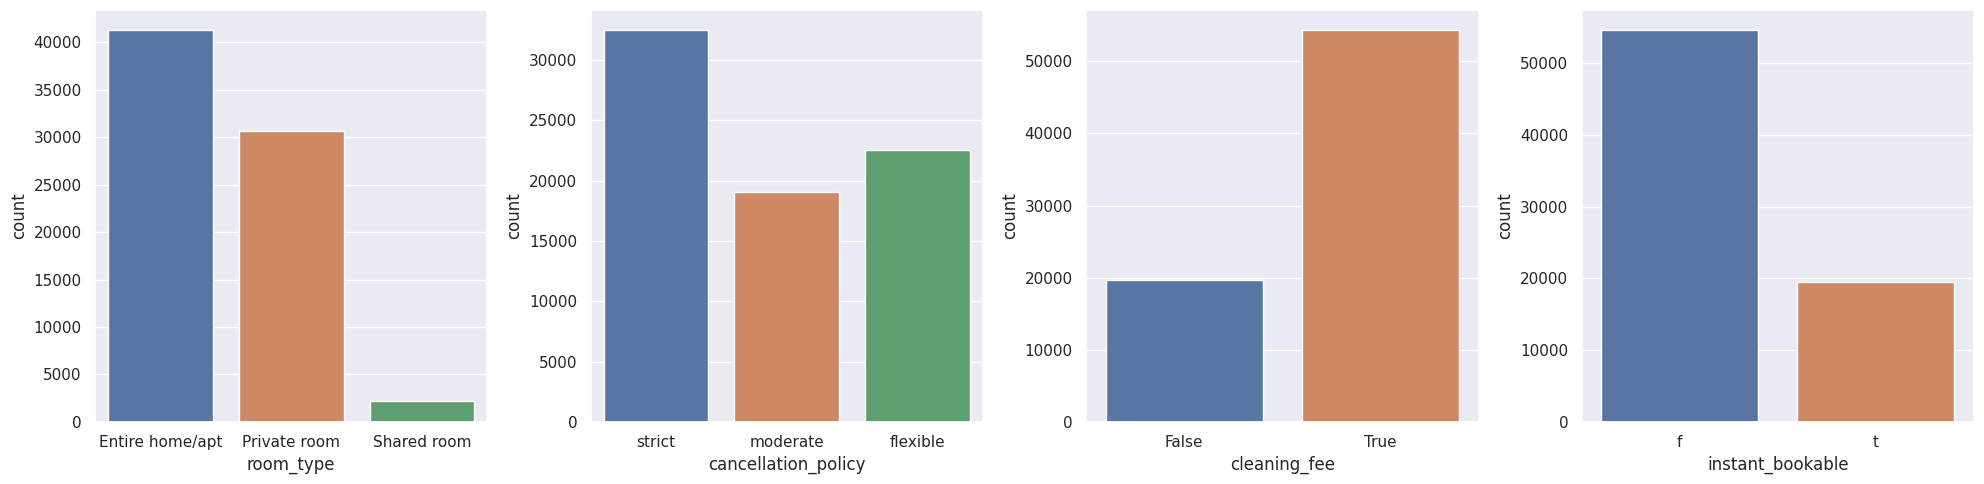

In [58]:
plt.figure(figsize=(20,5));
index = 1;
for feature in categorical_ordinal_feature:
  sns.countplot(data=df, x=feature, ax=plt.subplot(1,4,index));
  index += 1;
plt.tight_layout();
plt.show();

### Discreate numerical data distribution

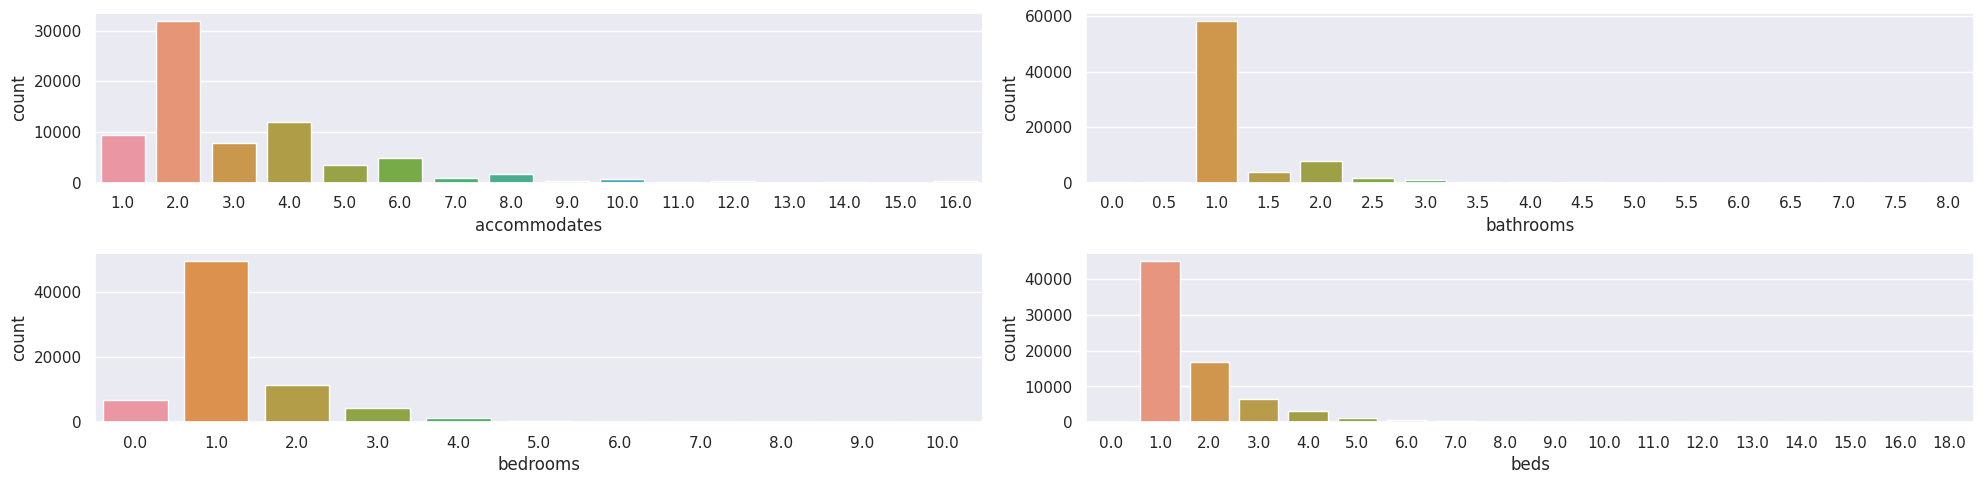

In [59]:
plt.figure(figsize=(20,5));
index = 1;
for feature in numerical_discrete_feature:
  axes = plt.subplot(2,2,index);
  sns.countplot(data=df, x=feature, ax=axes);
  index += 1;
plt.tight_layout();
plt.show();

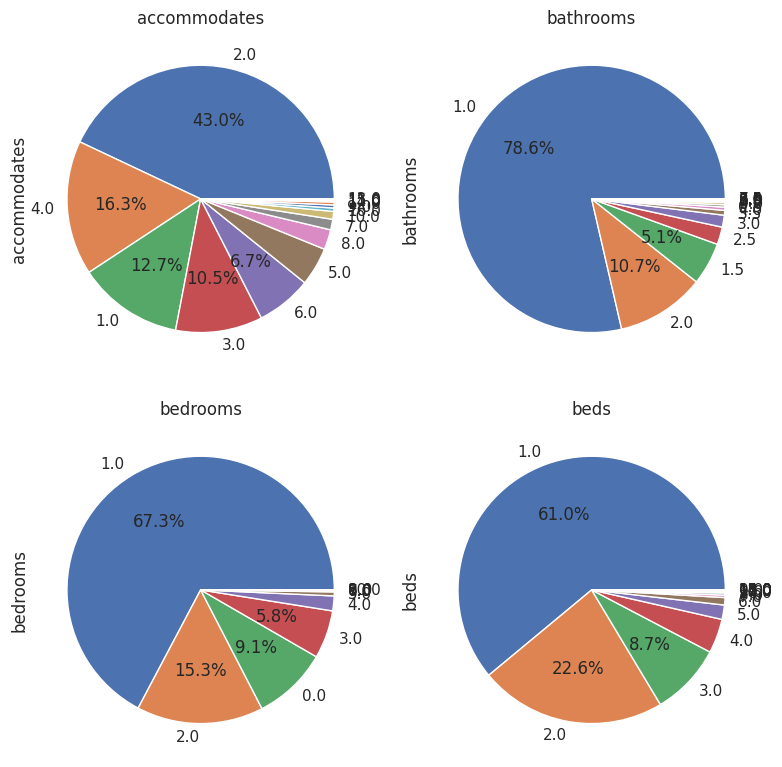

In [60]:
plt.figure(figsize=(8,8));
index = 1;
for feature in numerical_discrete_feature:
  plt.subplot(2,2,index);
  df[feature].value_counts().plot(kind="pie", autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5 else '');
  plt.title(feature)
  index += 1;
plt.tight_layout();
plt.show();

### Continous numerical data distribution

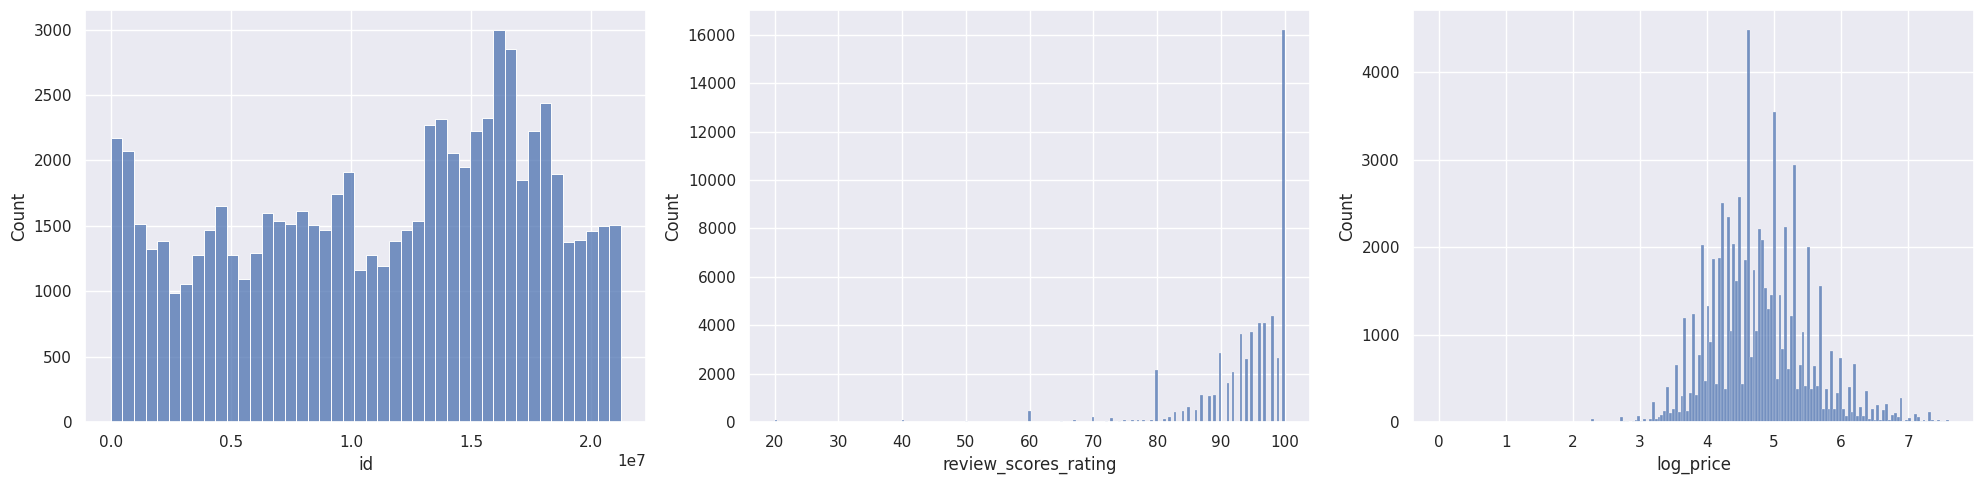

In [61]:
plt.figure(figsize=(20,5));
index = 1;
for feature in numerical_continous_feature:
  axes = plt.subplot(1,3,index);
  sns.histplot(data=df, x=feature, ax=axes);
  index += 1;
plt.tight_layout();
plt.show();

## Five point summary

In [62]:
df.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


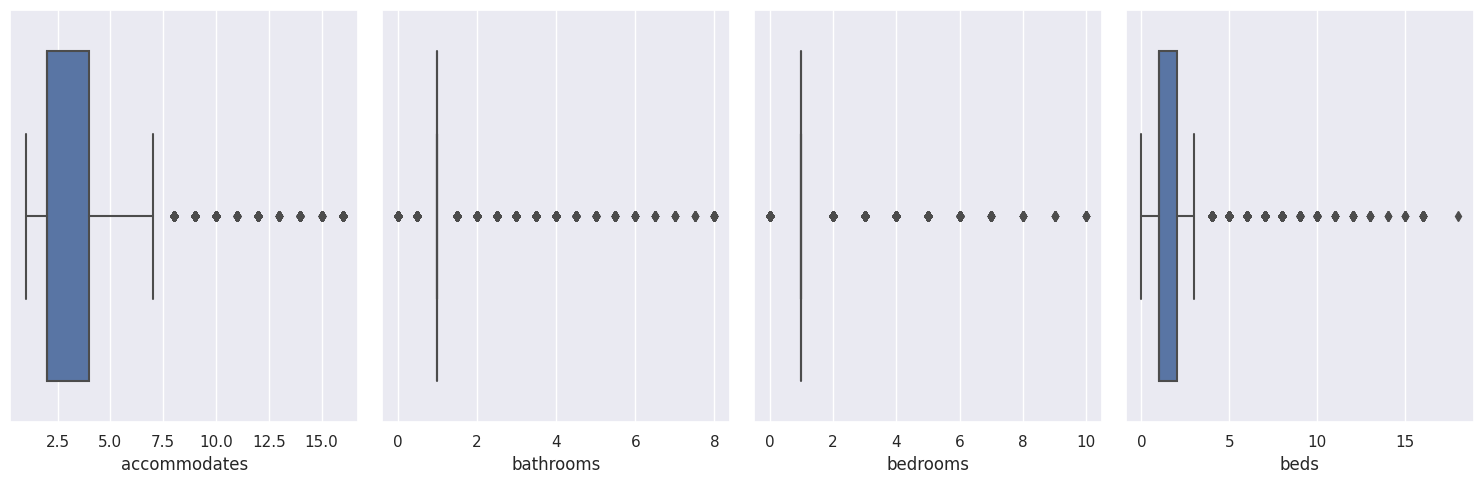

In [63]:
plt.figure(figsize=(15,5));
index = 1;
for feature in numerical_discrete_feature:
  axes = plt.subplot(1,4,index);
  sns.boxplot(data=df, x=feature, ax=axes);
  index += 1;
plt.tight_layout();
plt.show();

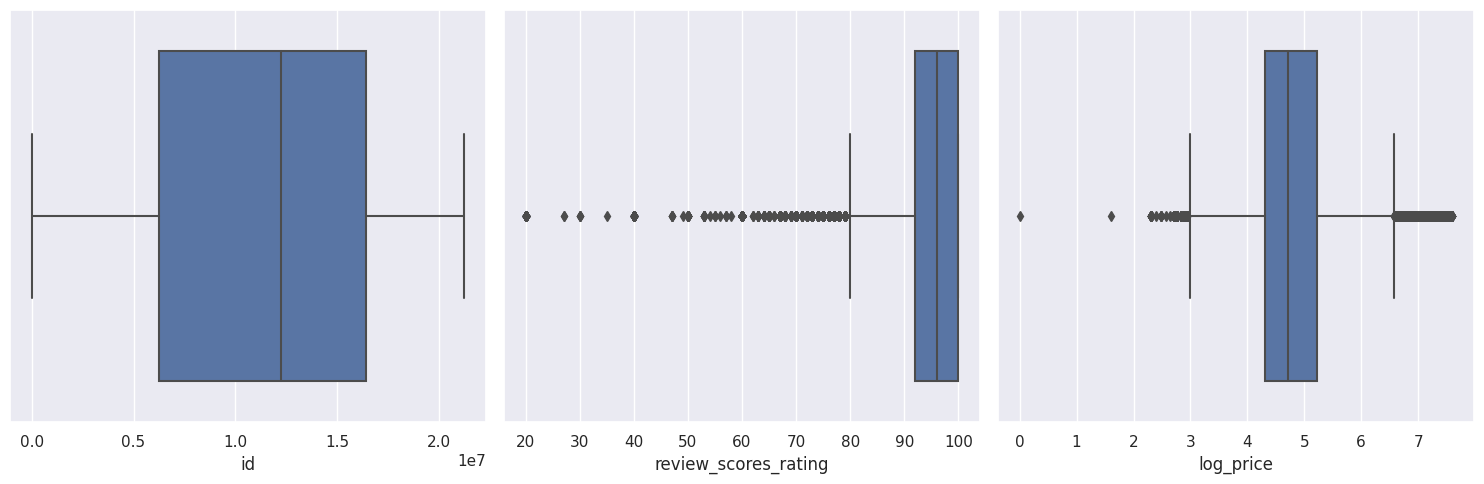

In [64]:
plt.figure(figsize=(15,5));
index = 1;
for feature in numerical_continous_feature:
  axes = plt.subplot(1,3,index);
  sns.boxplot(data=df, x=feature, ax=axes);
  index += 1;
plt.tight_layout();
plt.show();

## Correlation

* accommodates and beds are strong positive correlated with 0.81(Pearson) and 0.78(Spearson) value.

<Axes: >

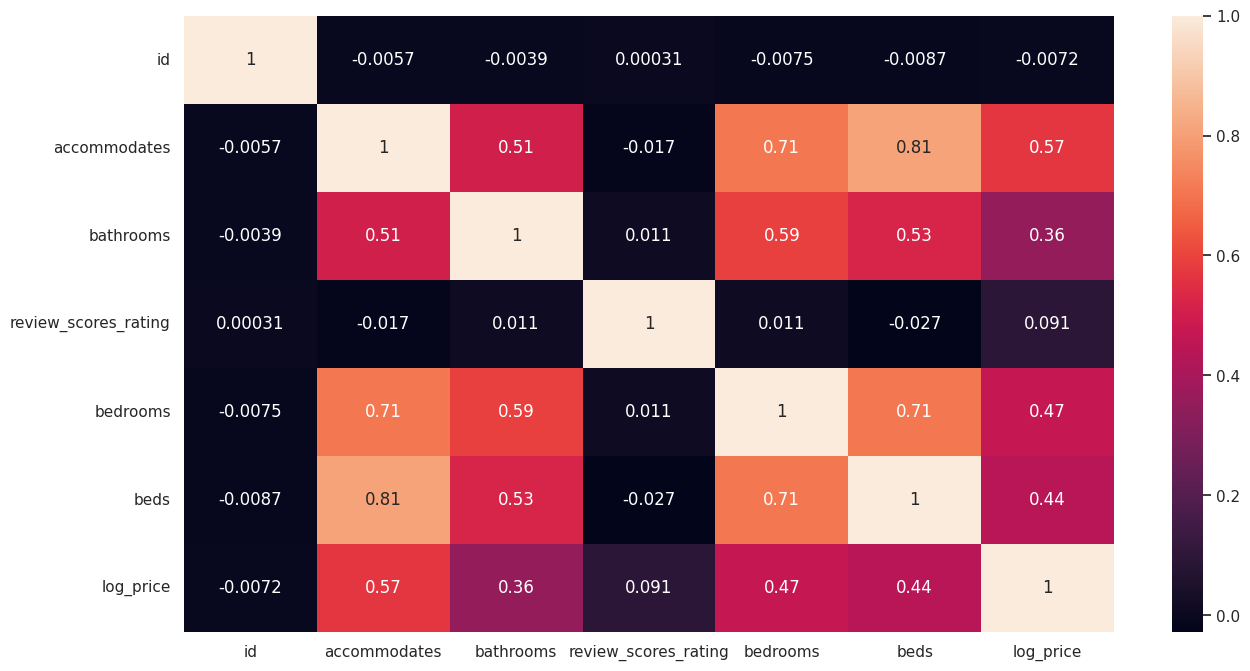

In [65]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

<Axes: >

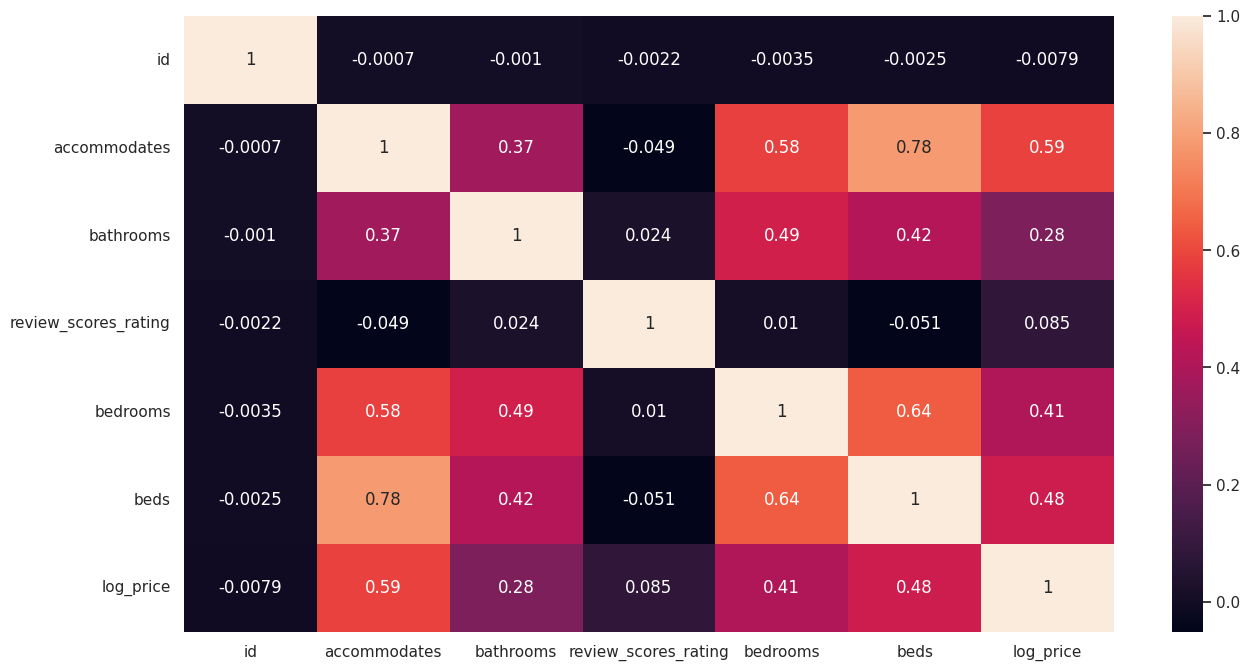

In [66]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(method="spearman"), annot=True)

# Data preprocessing

In [67]:
p_df = df.copy();
p_df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


## Handling missing observations

### Handling categorical missing observations

In [68]:
for feature in categorical_ordinal_feature:
  p_df[feature].fillna(df[feature].mode()[0], inplace=True);

p_df[categorical_ordinal_feature].isna().sum()

room_type              0
cancellation_policy    0
cleaning_fee           0
instant_bookable       0
dtype: int64

### Handling numerical discrete missing observations

In [69]:
for feature in numerical_discrete_feature:
  p_df[feature].fillna(df[feature].median(), inplace=True);

p_df[numerical_discrete_feature].isna().sum()

accommodates    0
bathrooms       0
bedrooms        0
beds            0
dtype: int64

### Handling numerical continous missing observations

In [70]:
for feature in numerical_continous_feature:
  p_df[feature].fillna(df[feature].median(), inplace=True);

p_df[numerical_continous_feature].isna().sum()

id                      0
review_scores_rating    0
log_price               0
dtype: int64

## Handling outliers

In [71]:
def fix_outliers_by_iqr(data, feature):
  q1 = data[feature].quantile(0.25);
  q3 = data[feature].quantile(0.75);
  iqr = q3 - q1;
  se = 1.5 * iqr;
  upper = q3 + se;
  lower = q1 - se;
  data[feature] = np.where(data[feature] > upper, upper,
                  np.where(data[feature] < lower, lower, data[feature]));

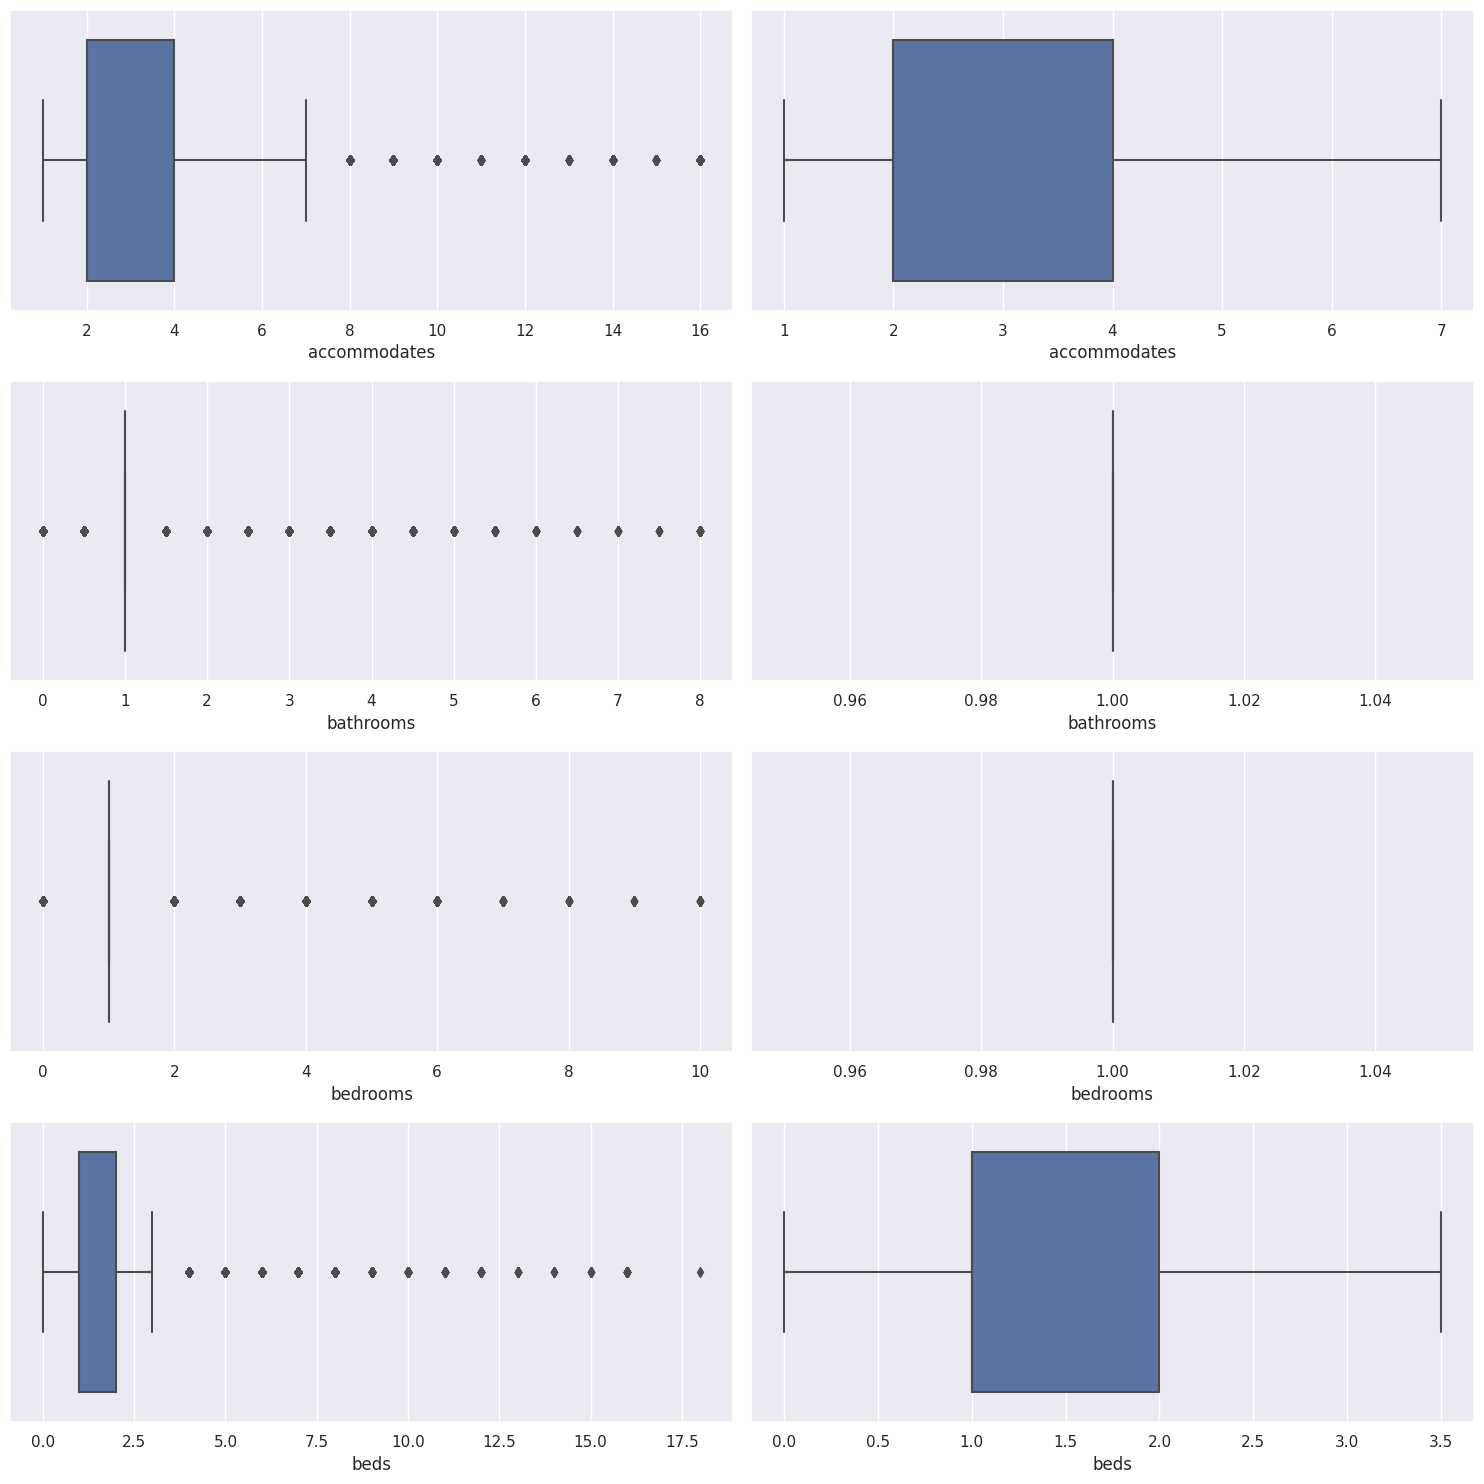

In [72]:
plt.figure(figsize=(15,15));
index = 1;
for feature in numerical_discrete_feature:
  # Before fix
  axes = plt.subplot(4,2,index);
  sns.boxplot(data=p_df, x=feature, ax=axes);
  index += 1;

  # Fix
  fix_outliers_by_iqr(p_df, feature);

  # After fix
  axes = plt.subplot(4,2,index);
  sns.boxplot(data=p_df, x=feature, ax=axes);
  index += 1;
plt.tight_layout();
plt.show();

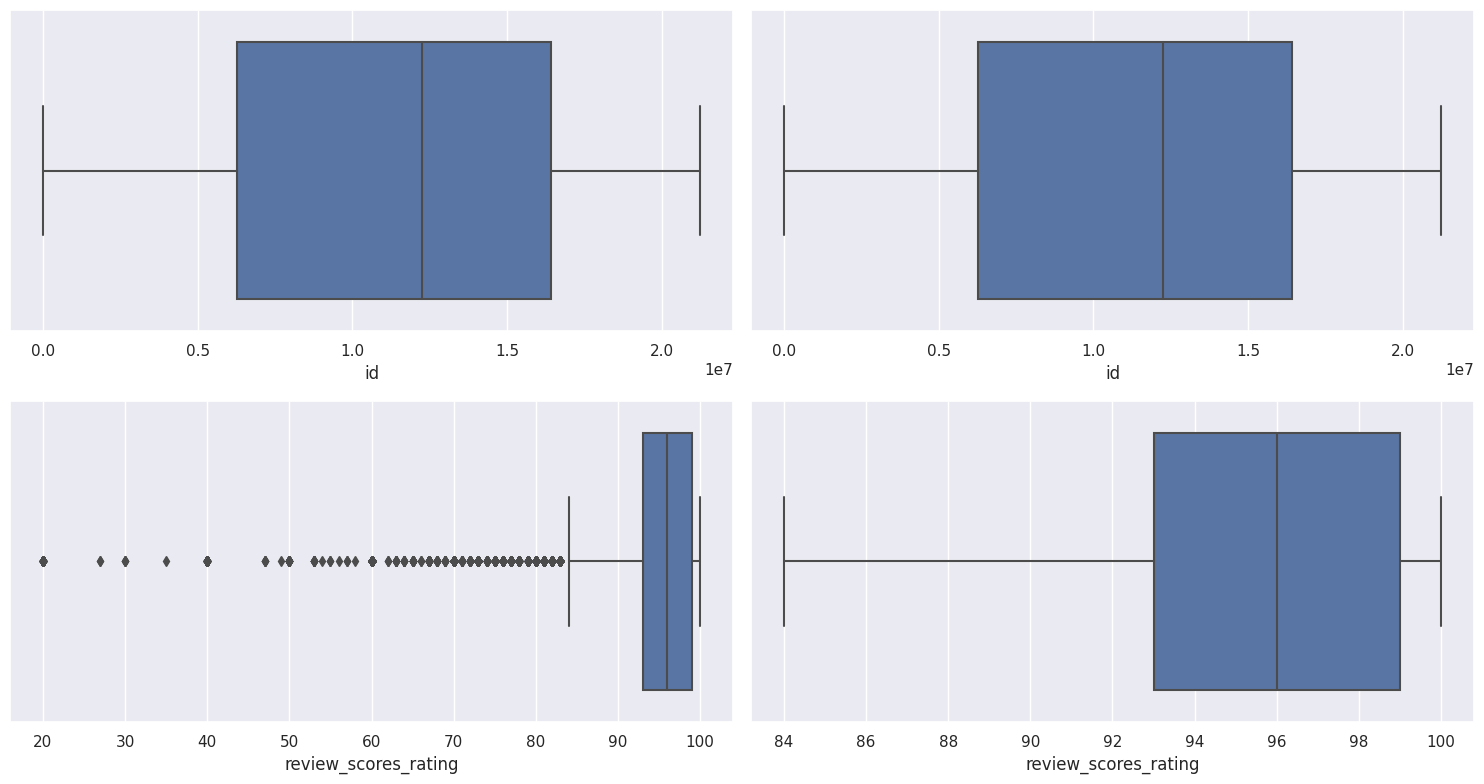

In [73]:
plt.figure(figsize=(15,8));
index = 1;
target = "log_price";
for feature in numerical_continous_feature:
  if (feature != target) :
    # Before fix
    axes = plt.subplot(2,2,index);
    sns.boxplot(data=p_df, x=feature, ax=axes);
    index += 1;

    # Fix
    fix_outliers_by_iqr(p_df, feature);

    # After fix
    axes = plt.subplot(2,2,index);
    sns.boxplot(data=p_df, x=feature, ax=axes);
    index += 1;
plt.tight_layout();
plt.show();

## Feature engineering

In [88]:
t_df = p_df.copy();
t_df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257.0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928.0,Entire home/apt,7.0,1.0,strict,True,t,93.0,1.0,3.0,5.129899
2,7919400.0,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779.0,Entire home/apt,4.0,1.0,flexible,True,f,96.0,1.0,2.0,6.620073
4,3808709.0,Entire home/apt,2.0,1.0,moderate,True,t,84.0,1.0,1.0,4.744932


### Removing not enough unique values

In [89]:
unique_value_counts = []
for feature in t_df.columns:
  unique_value_counts.append(len(t_df[feature].dropna().unique()));

display(pd.DataFrame(unique_value_counts, index=t_df.columns, columns=["unique_value_count"]))

,unique_value_count
id,74111
room_type,3
accommodates,7
bathrooms,1
cancellation_policy,3
cleaning_fee,2
instant_bookable,2
review_scores_rating,17
bedrooms,1
beds,5


In [90]:
# Features that consist 95%-100% out of 1 unique value or a null value, is not going to affect the prediction.
# droping ["id", "bathrooms", "bedrooms" ] features
drop_features = ["id", "bathrooms", "bedrooms" ];
t_df.drop(labels= drop_features, axis=1, inplace=True);
t_df.head()

,room_type,accommodates,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,beds,log_price
0,Entire home/apt,3.0,strict,True,f,100.0,1.0,5.010635
1,Entire home/apt,7.0,strict,True,t,93.0,3.0,5.129899
2,Entire home/apt,5.0,moderate,True,t,92.0,3.0,4.976734
3,Entire home/apt,4.0,flexible,True,f,96.0,2.0,6.620073
4,Entire home/apt,2.0,moderate,True,t,84.0,1.0,4.744932


In [91]:
unique_value_counts = []
for feature in t_df.columns:
  unique_value_counts.append(len(t_df[feature].dropna().unique()));

display(pd.DataFrame(unique_value_counts, index=t_df.columns, columns=["unique_value_count"]))

,unique_value_count
room_type,3
accommodates,7
cancellation_policy,3
cleaning_fee,2
instant_bookable,2
review_scores_rating,17
beds,5
log_price,767


### Removing correlated feature

<Axes: >

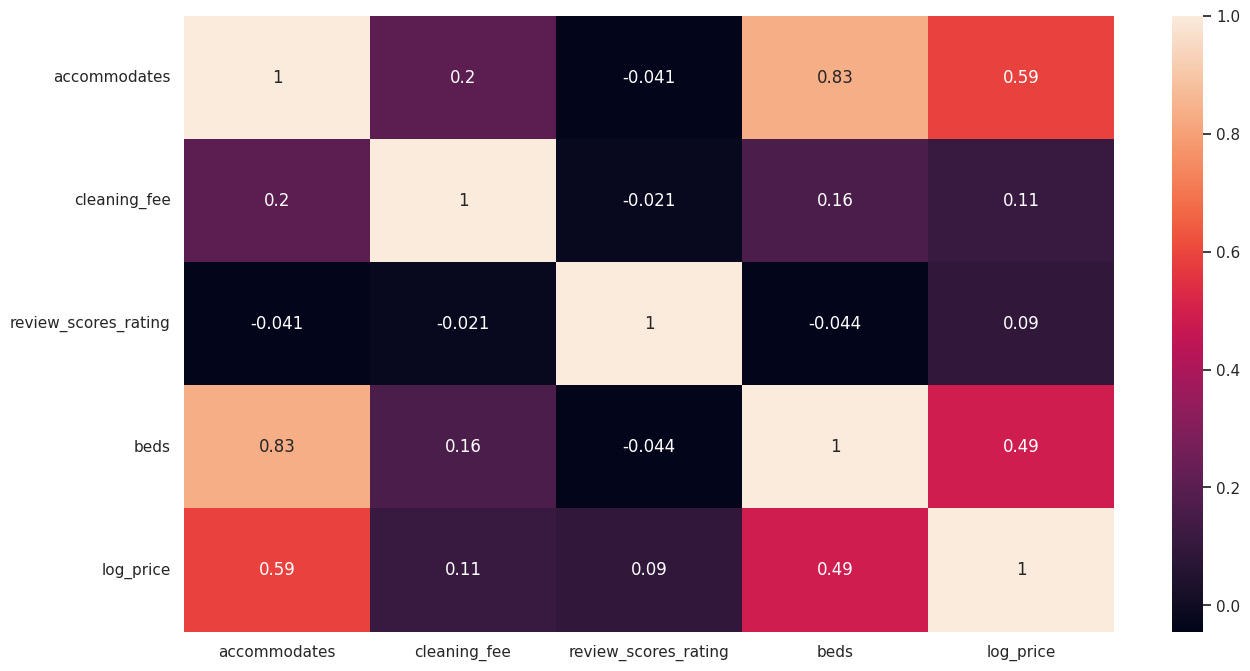

In [92]:
plt.figure(figsize=(15, 8))
sns.heatmap(t_df.corr(), annot=True)

<Axes: >

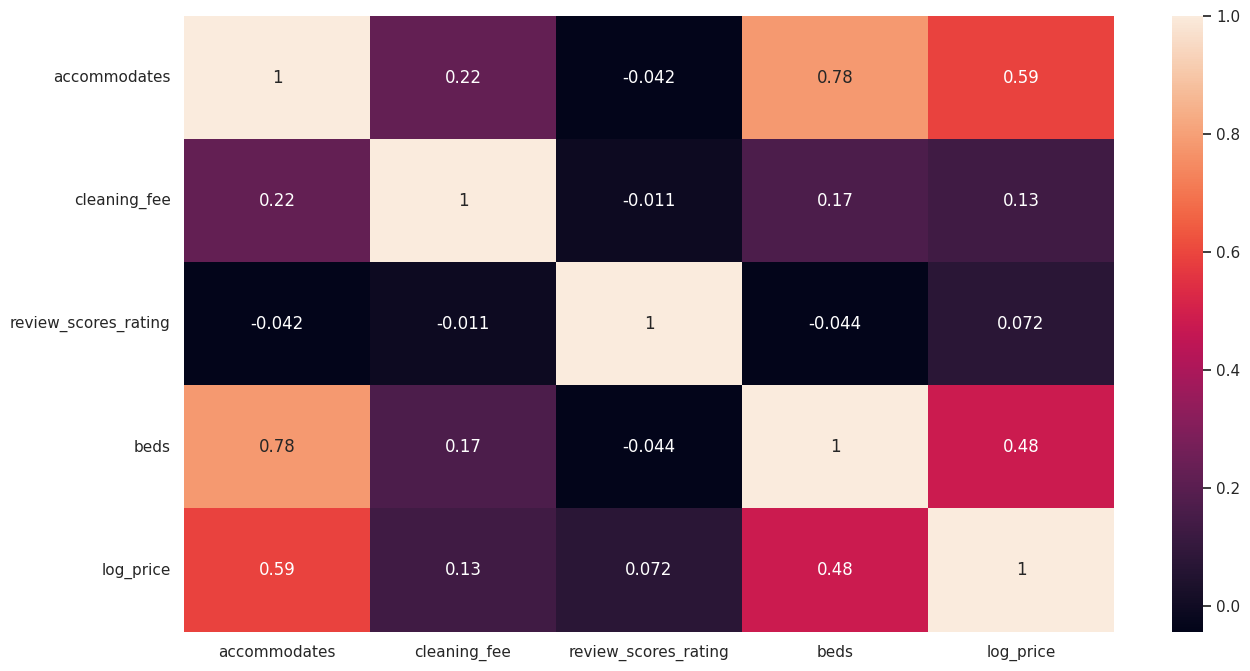

In [93]:
plt.figure(figsize=(15, 8))
sns.heatmap(t_df.corr(method="spearman"), annot=True)

In [94]:
# removing beds as it is strongly positively correlated with accommodates
drop_features = ["beds"];
t_df.drop(labels= drop_features, axis=1, inplace=True);
t_df.head()

,room_type,accommodates,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,log_price
0,Entire home/apt,3.0,strict,True,f,100.0,5.010635
1,Entire home/apt,7.0,strict,True,t,93.0,5.129899
2,Entire home/apt,5.0,moderate,True,t,92.0,4.976734
3,Entire home/apt,4.0,flexible,True,f,96.0,6.620073
4,Entire home/apt,2.0,moderate,True,t,84.0,4.744932


### Encoding

In [95]:
t_df.dtypes

room_type                object
accommodates            float64
cancellation_policy      object
cleaning_fee               bool
instant_bookable         object
review_scores_rating    float64
log_price               float64
dtype: object

In [96]:
for feature in t_df.select_dtypes(include="object"):
  print(feature);
  display(t_df[feature].unique());
  print("-"*100);

room_type


array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

----------------------------------------------------------------------------------------------------
cancellation_policy


array(['strict', 'moderate', 'flexible'], dtype=object)

----------------------------------------------------------------------------------------------------
instant_bookable


array(['f', 't'], dtype=object)

----------------------------------------------------------------------------------------------------


In [100]:
# categorical data is ordinal so going for ordinal encoding
room_type_mapper = {"Entire home/apt":1, "Private room":2, "Shared room":3}
t_df.room_type = t_df.room_type.replace(room_type_mapper);

cancellation_policy_mapper = {"strict":1, "moderate":2, "flexible":3}
t_df.cancellation_policy = t_df.cancellation_policy.replace(cancellation_policy_mapper);

instant_bookable_mapper = {"f":0, "t":1}
t_df.instant_bookable = t_df.instant_bookable.replace(instant_bookable_mapper);

cleaning_fee_mapper = {False:0, True:1}
t_df.cleaning_fee = t_df.cleaning_fee.replace(cleaning_fee_mapper);

In [102]:
t_df.head()

,room_type,accommodates,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,log_price
0,1,3.0,1,1,0,100.0,5.010635
1,1,7.0,1,1,1,93.0,5.129899
2,1,5.0,2,1,1,92.0,4.976734
3,1,4.0,3,1,0,96.0,6.620073
4,1,2.0,2,1,1,84.0,4.744932


In [103]:
t_df.dtypes

room_type                 int64
accommodates            float64
cancellation_policy       int64
cleaning_fee              int64
instant_bookable          int64
review_scores_rating    float64
log_price               float64
dtype: object

## Model Building

In [106]:
# independent
x = t_df.iloc[:,0:-1];
print("Independent");
display(x.head());

print("-"*100);

# target
y = t_df['log_price'];
print("Target");
display(y.head());

Independent


,room_type,accommodates,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating
0,1,3.0,1,1,0,100.0
1,1,7.0,1,1,1,93.0
2,1,5.0,2,1,1,92.0
3,1,4.0,3,1,0,96.0
4,1,2.0,2,1,1,84.0


----------------------------------------------------------------------------------------------------
Target


0    5.010635
1    5.129899
2    4.976734
3    6.620073
4    4.744932
Name: log_price, dtype: float64

### Feature Scaling

In [173]:
from sklearn import preprocessing;
n_x = x.copy();
n_x.review_scores_rating = preprocessing.normalize([n_x.review_scores_rating])[0]
display(n_x)

,room_type,accommodates,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating
0,1,3.0,1,1,0,0.003858
1,1,7.0,1,1,1,0.003588
2,1,5.0,2,1,1,0.003550
3,1,4.0,3,1,0,0.003704
4,1,2.0,2,1,1,0.003241
...,...,...,...,...,...,...
74106,2,1.0,3,0,0,0.003704
74107,1,4.0,2,1,0,0.003588
74108,1,5.0,2,1,1,0.003627
74109,1,2.0,1,1,1,0.003704


### Data split

In [174]:
from sklearn.model_selection import train_test_split;

In [175]:
x_train, x_test, y_train, y_test = train_test_split(n_x, y, test_size=0.30, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(51877, 6) (22234, 6) (51877,) (22234,)


### Model Selection

In [176]:
models = [];

#### Linear Regression

In [177]:
from sklearn.linear_model import LinearRegression;

In [178]:
sk_lr = LinearRegression();
sk_lr.fit(x_train, y_train);

In [179]:
models.append(('sk_lr',  sk_lr));

#### Linear Regression by OLS

In [180]:
from statsmodels.regression.linear_model import OLS;

In [181]:
st_lr = OLS(endog = y_train, exog=x_train).fit();

In [182]:
models.append(('st_lr',  st_lr));

#### Lasso regularization

In [183]:
from sklearn.linear_model import Lasso;

In [184]:
lasso = Lasso(alpha=0.1);
lasso.fit(x_train, y_train);

In [185]:
models.append(('lasso',  lasso));

#### Ridge regularization

In [186]:
from sklearn.linear_model import Ridge;

In [187]:
ridge = Ridge(alpha=0.3);
ridge.fit(x_train, y_train);

In [188]:
models.append(('ridge',  ridge));

#### ElasticNet

In [189]:
from sklearn.linear_model import ElasticNet;

In [190]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1);
elastic.fit(x_train, y_train);

In [191]:
models.append(('elastic',  elastic));

#### Gradient Descent

In [192]:
from sklearn.linear_model import SGDRegressor;

In [193]:
sgd = SGDRegressor();
sgd.fit(x_train, y_train);

In [194]:
models.append(('sgd',  sgd));

### Performance Matrix

In [195]:
from sklearn import metrics;

In [196]:
def compute_performance(x_train, x_test, y_train, y_test, name, model):
  print(f'Model : {name}');
  y_pred_train_model = model.predict(x_train);
  y_pred_test_model  = model.predict(x_test);
  print("Training Accuracy :", metrics.r2_score(y_train, y_pred_train_model));
  print("Test Accuracy :", metrics.r2_score(y_test, y_pred_test_model));
  print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_pred_test_model));
  print("Mean Absolute Percentage Error :", metrics.mean_absolute_error(y_test, y_pred_test_model)/100);
  print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred_test_model));
  print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model)));
  print("-"*50+"End"+"-"*50);

In [197]:
for name, model in models:
  compute_performance(x_train, x_test, y_train, y_test, name, model);

Model : sk_lr
Training Accuracy : 0.4840997147297412
Test Accuracy : 0.48854308813838887
Mean Absolute Error : 0.38903393708812567
Mean Absolute Percentage Error : 0.0038903393708812567
Mean Squared Error : 0.26263772554952264
Root Mean Squared Error : 0.5124819270467229
--------------------------------------------------End--------------------------------------------------
Model : st_lr
Training Accuracy : 0.4286977774828248
Test Accuracy : 0.4309678926545346
Mean Absolute Error : 0.4154977254213687
Mean Absolute Percentage Error : 0.004154977254213687
Mean Squared Error : 0.2922031064042058
Root Mean Squared Error : 0.5405581434075393
--------------------------------------------------End--------------------------------------------------
Model : lasso
Training Accuracy : 0.4022395027280051
Test Accuracy : 0.40622805943835116
Mean Absolute Error : 0.42059004431915575
Mean Absolute Percentage Error : 0.0042059004431915575
Mean Squared Error : 0.30490723333197145
Root Mean Squared Error :